In [1]:
import random
from math import sin,log,pi
import matplotlib.pyplot as plt 

In [7]:
random.seed(12345)

step = lambda DX, bias: round((log(random.random()) * DX) * 2*(random.randint(0,1)-0.5) + bias)
# DX represents a sort of resolution of a certain detector. It is indeed the step of the markov process jumping from one site to another.
# it is the inverse sampling of a symmetric exponential distribution centered in zero through the traslation -0.5

# by making the cast into an int when we get as output a positive integer is is uprounded instead a negative one is downrounded ?? We use then round()

for i in range(10):
    print(step(50,5))

def pattern(y,z,a,i):
    """...."""
    return round((3-2*y) * a * sin((pi*i)/z))

49
-5
13
-60
96
-2
34
30
57
-27


In [8]:
random.seed(12345)
#pattern features
Z = 12
A = 500

#data
N = 10000
L = 60

DX = 50
bias = 5

y = [0] * N # a zeros array and we don't want here to use numpy 
x = [[0] * L for i in range(N)]

# generating the x samples 

for n in range(N):
    if n > 0 : 
        x[n][0] = x[n-1][-1]
    for j in range(1,L):
        x[n][j] = x[n][j-1] + step(DX,bias)

    y[n] = n%3
    if y[n] > 0:
        j0 = random.randint(0,L-1-Z)
        for j in range(Z):
            x[n][j0+j] += pattern(y[n],Z,A,j)

for n in range(3):
    print(x[n],y[n])

[0, 49, 44, 57, -3, 93, 91, 125, 155, 212, 185, 217, 317, 239, 187, 138, 426, 444, 387, 504, 524, 527, 543, 442, 524, 461, 499, 663, 728, 828, 780, 692, 915, 937, 989, 982, 1064, 1106, 897, 846, 855, 910, 944, 914, 992, 1088, 1124, 1033, 1044, 982, 851, 900, 909, 734, 826, 917, 920, 981, 1008, 1036] 0
[1036, 1055, 1005, 1114, 1052, 1213, 1241, 1339, 1279, 1265, 1211, 1158, 1255, 1421, 1583, 1687, 1916, 1931, 1834, 1711, 1621, 1393, 1327, 1246, 1126, 1058, 1143, 1257, 1250, 1302, 1236, 1336, 1273, 1186, 1354, 1477, 1452, 1458, 1476, 1454, 1486, 1452, 1642, 1640, 1665, 1613, 1464, 1422, 1531, 1508, 1515, 1544, 1546, 1560, 1526, 1673, 1673, 1693, 1746, 1751] 1
[1751, 1761, 1674, 1687, 1713, 1730, 1764, 1887, 1815, 1745, 1735, 1761, 1787, 1759, 1692, 1678, 1645, 1581, 1629, 1546, 1618, 1600, 1418, 1428, 1421, 1247, 1202, 1280, 1354, 1564, 1625, 1621, 1531, 1337, 1234, 1148, 1075, 1097, 1098, 1157, 1246, 1373, 1433, 1561, 1529, 1553, 1573, 1578, 1597, 1579, 1492, 1492, 1405, 1387, 1350, 128

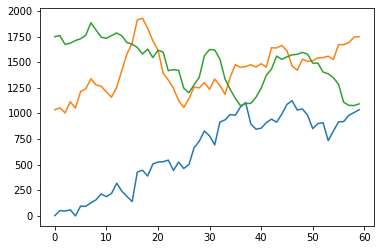

In [14]:
plt.plot(x[0])
plt.plot(x[1])
plt.plot(x[2])
plt.show()

In [17]:
import os
os.system("mkdir DATA")

import csv
str0 = f"ts_l{L}_Z{Z}_A{A}_DX{DX}_bias{bias}_N{N}"
fname = "data/x_" + str0 + ".csv"
with open(fname, mode="w") as myfile:
    writer = csv.writer(myfile)
    for n in range(N):
        writer.writerow(x[n])

fname = "DATA/y_" + str0 + ".csv"
with open(fname, mode="w") as myfile:
    writer = csv.writer(myfile)
    writer.writerows(map(lambda yy: [yy], y))